In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import sys
from tqdm import tqdm
import json

In [2]:
df = pd.read_csv('sponsored_image.csv', index_col=0)
df.head()

,json_file,image_files
0,1309041812857818435.json,['1309041812857818435.jpg']
1,1476490497539529413.json,['1476490497539529413.jpg']
2,1606115486206804899.json,['1606115486206804899.jpg']
3,1606130952468007792.json,['1606130909971240023.jpg']
4,1651957573904970960.json,['1651957573904970960.jpg']


In [3]:
def extract_filenames(row):
    filenames = row['image_files']
    filenames_list = eval(filenames)
    return filenames_list

all_images = []
for index, row in df.iterrows():
    filenames_list = extract_filenames(row)
    all_images.extend(filenames_list)

len(all_images)

122196

In [4]:
def extract_image_files(zip_file_paths, files_to_extract, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    cnt = 0

    for zip_file_path in zip_file_paths:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            total_files = len(files_to_extract)
            for file in tqdm(files_to_extract, total=total_files, desc="Extracting files"):
                full_path = f"img_resized/{file}"
                if full_path in zip_ref.namelist():
                    zip_ref.extract(full_path, output_dir)
                    cnt += 1
    
    print(f"Total extracted files: {cnt}")

In [ ]:
zip_file_paths = ['img_fi01.zip', 'img_fi02.zip', 'img_fi03.zip', 'img_fi04.zip',
                  'img_fi05.zip', 'img_fi06.zip', 'img_fi07.zip', 'img_fi08.zip',
                  'img_fi09.zip', 'img_fi10.zip', 'img_fi11.zip', 'img_fi12.zip',
                  'img_fi13.zip', 'img_fi14.zip', 'img_fi15.zip', 'img_fi16.zip']
output_dir = 'images'

extract_image_files(zip_file_paths, all_images, output_dir)

Extracting files:   6%|▌         | 7005/122196 [01:21<21:49, 87.99it/s] 

In [14]:
df = pd.read_csv('image_er.csv')
df

,json_file,ER,image_file
0,1973691269452645660.json,1.667481,1973691269452645660.jpg
1,1964991022997339870.json,1.523519,1964991022997339870.jpg
2,1965715620176466700.json,1.512930,1965715616124693168.jpg
3,1972047318845521067.json,1.465816,1972047313200055132.jpg
4,1862354468589268257.json,1.268122,1862349659926824549.jpg
...,...,...,...
57320,2023494287911834906.json,0.000123,2023494283021291811.jpg
57321,2024180482329329088.json,0.000116,2024180478093280082.jpg
57322,2024141550581669071.json,0.000113,2024141550581669071.jpg
57323,2019606855207921783.json,0.000102,2019606850904621965.jpg


In [9]:
image_json_list = df['image_file'].tolist()

In [10]:
def check_img_exists(img_list, dir_path):
    missing = []
    for img_path in img_list:
        if not os.path.exists(os.path.join(dir_path, img_path)):
            missing.append(img_path)
    return missing

missing_imgs = check_img_exists(image_json_list, "images/img_resized")
print(missing_imgs)

['1633324458637193353.jpg', '1738670130098674040.jpg', '1795910704970962620.jpg', '1811063173673788032.jpg', '1811783008246503234.jpg', '1771301911419223344.jpg', '1868384325353123104.jpg', '1840842028814812294.jpg', '1791551779312105111.jpg', '1800824811390035099.jpg', '1829856071336705104.jpg', '1895728773098320325.jpg', '1857724296810810997.jpg']


In [13]:
tmp = df[~df['image_file'].isin(missing_imgs)]
tmp

,json_file,ER,image_file
0,1973691269452645660.json,1.667481,1973691269452645660.jpg
1,1964991022997339870.json,1.523519,1964991022997339870.jpg
2,1965715620176466700.json,1.512930,1965715616124693168.jpg
3,1972047318845521067.json,1.465816,1972047313200055132.jpg
4,1862354468589268257.json,1.268122,1862349659926824549.jpg
...,...,...,...
57320,2023494287911834906.json,0.000123,2023494283021291811.jpg
57321,2024180482329329088.json,0.000116,2024180478093280082.jpg
57322,2024141550581669071.json,0.000113,2024141550581669071.jpg
57323,2019606855207921783.json,0.000102,2019606850904621965.jpg


In [15]:
def extract_json_files(zip_file_paths, files_to_extract, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    cnt = 0

    for zip_file_path in zip_file_paths:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            total_files = len(files_to_extract)
            for file in tqdm(files_to_extract, total=total_files, desc="Extracting files"):
                full_path = f"json/{file}"
                if full_path in zip_ref.namelist():
                    zip_ref.extract(full_path, output_dir)
                    cnt += 1
    
    print(f"Total extracted files: {cnt}")

In [16]:
zip_file_paths = ['json_fashion.zip', 'json_fashion_1.zip']

extract_json_files(zip_file_paths, image_json_list, os.getcwd())

Extracting files: 100%|██████████| 57325/57325 [21:10<00:00, 45.12it/s] 

Total extracted files: 57325


In [15]:
def process_json_files(dir, json_list):
    df_list = []
    for i in json_list:
        data = []
        content = json.load(open(os.path.join(dir, i)))
        try:
            post_text = content['edge_media_to_caption']['edges'][0]['node']['text']
        except (IndexError, KeyError):
            post_text = ''
            
        data.append({
            'json': i,
            'post_timestamp': content['taken_at_timestamp'],
            'likes': content['edge_media_preview_like']['count'],
            'comments_api': content['edge_media_to_comment']['count'],
            'comments_egdes': len(content['edge_media_to_caption']['edges']),
            'post_text': post_text,
            'edge_media_to_comment': content.get('edge_media_to_comment').get('edges'),
            'edge_media_to_sponsor_user': content.get('edge_media_to_sponsor_user'),
            'edge_media_to_tagged_user': content.get('edge_media_to_tagged_user')
        })
        df_list.append(pd.DataFrame(data))

    df = pd.concat(df_list, ignore_index=True)
    return df

In [16]:
tp = process_json_files('json', tmp['json_file'].tolist())

In [17]:
tmp['post_text'] = tp['post_text']

In [9]:
import re
def remove_special_characters(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

df['post_text'] = df['post_text'].apply(lambda x: remove_special_characters(x))
df

,json_file,ER,image_file,post_text
0,1973691269452645660.json,1.667481,1973691269452645660.jpg,In jumpsuit heaven with windsorstore Just pret...
1,1964991022997339870.json,1.523519,1964991022997339870.jpg,Friday basics ChickFilA BEST DAY EVERJust pi...
2,1965715620176466700.json,1.512930,1965715616124693168.jpg,Neutral sweaters are the best kind of sweaters...
3,1972047318845521067.json,1.465816,1972047313200055132.jpg,SORREO CERRADO ganadora mama_y_papa_de_kalani...
4,1862354468589268257.json,1.268122,1862349659926824549.jpg,OSALLISTU ÄÄNESTYKSEEN Valitse suosikkisilmäla...
...,...,...,...,...
57320,2023494287911834906.json,0.000123,2023494283021291811.jpg,AHKJewellery exhibition is happening on the 17...
57321,2024180482329329088.json,0.000116,2024180478093280082.jpg,Rouche Festive Collection is all about Intrica...
57322,2024141550581669071.json,0.000113,2024141550581669071.jpg,Fashion powerhouse ANAYA by Kiran Chaudhry pre...
57323,2019606855207921783.json,0.000102,2019606850904621965.jpg,Watch out for some trend setting footwear for ...


In [10]:
df['json_file'] = df['json_file'].astype(str)
df['image_file'] = df['image_file'].astype(str)
df['post_text'] = df['post_text'].astype(str)

In [12]:
df

,json_file,ER,image_file,post_text
0,1973691269452645660.json,1.667481,1973691269452645660.jpg,In jumpsuit heaven with windsorstore Just pret...
1,1964991022997339870.json,1.523519,1964991022997339870.jpg,Friday basics ChickFilA BEST DAY EVERJust pi...
2,1965715620176466700.json,1.512930,1965715616124693168.jpg,Neutral sweaters are the best kind of sweaters...
3,1972047318845521067.json,1.465816,1972047313200055132.jpg,SORREO CERRADO ganadora mama_y_papa_de_kalani...
4,1862354468589268257.json,1.268122,1862349659926824549.jpg,OSALLISTU ÄÄNESTYKSEEN Valitse suosikkisilmäla...
...,...,...,...,...
57320,2023494287911834906.json,0.000123,2023494283021291811.jpg,AHKJewellery exhibition is happening on the 17...
57321,2024180482329329088.json,0.000116,2024180478093280082.jpg,Rouche Festive Collection is all about Intrica...
57322,2024141550581669071.json,0.000113,2024141550581669071.jpg,Fashion powerhouse ANAYA by Kiran Chaudhry pre...
57323,2019606855207921783.json,0.000102,2019606850904621965.jpg,Watch out for some trend setting footwear for ...


In [ ]:
df.to_csv('image_er_text.csv', lineterminator = "\r\n", index = False)

In [22]:
test = pd.read_csv('image_er_text.csv')
test

,json_file,ER,image_file,post_text
0,1973691269452645660.json,1.667481,1973691269452645660.jpg,In jumpsuit heaven with windsorstore Just pret...
1,1964991022997339870.json,1.523519,1964991022997339870.jpg,Friday basics ChickFilA BEST DAY EVERJust pi...
2,1965715620176466700.json,1.512930,1965715616124693168.jpg,Neutral sweaters are the best kind of sweaters...
3,1972047318845521067.json,1.465816,1972047313200055132.jpg,SORREO CERRADO ganadora mama_y_papa_de_kalani...
4,1862354468589268257.json,1.268122,1862349659926824549.jpg,OSALLISTU ÄÄNESTYKSEEN Valitse suosikkisilmäla...
...,...,...,...,...
57318,2023494287911834906.json,0.000123,2023494283021291811.jpg,AHKJewellery exhibition is happening on the 17...
57319,2024180482329329088.json,0.000116,2024180478093280082.jpg,Rouche Festive Collection is all about Intrica...
57320,2024141550581669071.json,0.000113,2024141550581669071.jpg,Fashion powerhouse ANAYA by Kiran Chaudhry pre...
57321,2019606855207921783.json,0.000102,2019606850904621965.jpg,Watch out for some trend setting footwear for ...


In [20]:
missing_imgs

['1633324458637193353.jpg',
 '1738670130098674040.jpg',
 '1795910704970962620.jpg',
 '1811063173673788032.jpg',
 '1811783008246503234.jpg',
 '1771301911419223344.jpg',
 '1868384325353123104.jpg',
 '1840842028814812294.jpg',
 '1791551779312105111.jpg',
 '1800824811390035099.jpg',
 '1829856071336705104.jpg',
 '1895728773098320325.jpg',
 '1857724296810810997.jpg']

In [23]:
removed = test[~test['image_file'].isin(missing_imgs)]

In [24]:
removed.to_csv('image_er_text_removed.csv', lineterminator = "\r\n", index = False)

In [3]:
df = pd.read_csv('image_er_text_removed.csv')
df.head()

,json_file,ER,image_file,post_text
0,1973691269452645660.json,1.667481,1973691269452645660.jpg,In jumpsuit heaven with windsorstore Just pret...
1,1964991022997339870.json,1.523519,1964991022997339870.jpg,Friday basics ChickFilA BEST DAY EVERJust pi...
2,1965715620176466700.json,1.512930,1965715616124693168.jpg,Neutral sweaters are the best kind of sweaters...
3,1972047318845521067.json,1.465816,1972047313200055132.jpg,SORREO CERRADO ganadora mama_y_papa_de_kalani...
4,1862354468589268257.json,1.268122,1862349659926824549.jpg,OSALLISTU ÄÄNESTYKSEEN Valitse suosikkisilmäla...


<Axes: >

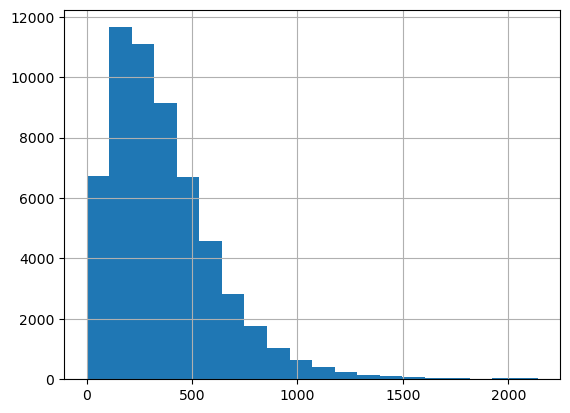

In [6]:
df['text_length'] = df['post_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['text_length'].hist(bins=20)